# Exercise 5

In [1]:
#!pip install streamlit

In [2]:
## !streamlit hello

In [3]:
#!pip install langchain

In [4]:
#!pip install langdetect

In [5]:
#!pip install -U torch

## Set Enviroment 

In [6]:
import os
import pandas as pd

In [7]:
import langdetect
from langdetect import DetectorFactory, detect, detect_langs

In [8]:
from langchain.llms import Ollama
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

In [9]:

from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate

In [10]:
# Embedding facilities
from langchain.embeddings import HuggingFaceEmbeddings

In [11]:
# Pipelines
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA

## Load Documents

In [12]:
import myloadlib
from myloadlib import loadDir, loadFile, loadWiki, loadYoutube, readAPI

In [13]:
import importlib 
importlib.reload(myloadlib)

<module 'myloadlib' from '/Users/mariamcnally/Desktop/SW2Semester/AI/OLA5/myloadlib.py'>

In [14]:
# Collect all here
documents = []

## Load single files

In [15]:
file = "./data/knitting_pdfs/knit.pdf"

In [16]:
#!pip install pypdf

In [17]:
docs = myloadlib.loadFile(file)

In [18]:
documents.extend(docs)
len(documents)

21

In [19]:
# metadata of loaded Document
docs[0].metadata 

{'source': './data/knitting_pdfs/knit.pdf', 'page': 0}

Content of page [0] = page 1. 

In [20]:
documents[0].page_content
#docs[0].page_content[:1000]
# First 1000 charactors.

' \n \nBeginning Knitting  \n \nWHAT IS KNITTING? \n \nHand knitting is to make fabric with yarn \non two or more needles.  A number of loops are first made on one needle, and then the fabric "grows\'\' by drawing other loops through them as they are passed back and forth along the needles from row to row. \n \nAll knitting comes from two kinds of stitches. One is called a "knit stitch," and the other is called a "purl stitch." There \nare several different ways or methods of knitting. Refer to directions in the pattern/instructions for explanations and types of stitches required.  \n \nKnitting can produce something useful, but the process can,  and should be, fun \nand relaxing.  The main thing is to learn to enjoy  knitting—relax while you work, \navoid a cramped position, have a good light to see by, and if your hands become tired, stop and rest a while.  \nHistory of Knitting \n \nKnitting is older than written history. No \none knows exactly when people began to knit, but we do k

## Ekstra single file

In [21]:
file = "./data/knitting_pdfs/knitting-handbook.pdf"

In [22]:
docs = myloadlib.loadFile(file)

In [23]:
documents.extend(docs)
len(documents)

61

In [24]:
docs[1].metadata 

{'source': './data/knitting_pdfs/knitting-handbook.pdf', 'page': 1}

In [25]:
documents[1].page_content

' 2 \nAll knitting patterns tell you the size of \nneedles you will need. Never discard your needles when you have fini shed the project.  \nIf you lose one needle and have to buy another pair the same size, keep the extra \nneedle. You never know when you may lose or break another one.   \n \n\x88    Crochet Hook  \nYou will need a crochet hook to pick \nup dropped stitches and to correct other mistakes. They also come in many sizes. Size C, or 6, is a good one for 4-ply knitting yarn. \n \n\x88    Measuring Tool  \nYou will need a measuring tool. You \ncan use a ruler, a measuring tape, or a metal measuring gauge. Be sure your \nmeasuring tool has both standard and \nmetric measurements. \n \n \n \n  \n\x88 Other helpful items: \n \nScissors  -    You will also want to \ninclude in your knitting basket a pair of small scissors (kept in a case for safety). \n \nYarn needle  -  a blunt-pointed yarn \nneedle for sewing your articles together. \n  Nail file or emery board   -  for catchy

## Load Youtube

In [26]:
url = 'https://www.youtube.com/watch?v=Zjq0MoUZqVY'
save_dir="./youtube/"

In [27]:
url

'https://www.youtube.com/watch?v=Zjq0MoUZqVY'

In [28]:
lang = 'en'

In [29]:
#!pip install youtube-transcript-api

In [30]:
#!pip install pytube

In [31]:
docs = myloadlib.loadYoutube(url, lang)

In [32]:
documents.extend(docs)
len(documents)

62

In [33]:
documents[61].type

'Document'

In [34]:
documents[61].page_content

"In, around, under and off. You'll\xa0 be dreaming this by the end. Hello knitters, i'm Marion from Lovecrafts\xa0 and I'm going to show you how to knit. Now, in this video we're going to do a\xa0little project where we start knitting\xa0from start to finish.  This is the little\xa0swatch we're going to knit. I'm going to\xa0show you how to start, how to cast on, how to knit this lovely knit stitch\xa0\xa0 and then how to cast off. So, it's everything\xa0 in one go.  Now if you learn to make one of these, you can make a scarf or a cushion cover or\xa0a pillow or a blanket - anything at all! \xa0 So, this is a really good tutorial just for some basic\xa0ground work before you start your knitting. So, I'm going to use Paint Box wool mix super chunky.\xa0And the reason i'm using a super chunky yarn\xa0\xa0 is because when you start knitting it's really\xa0important to be able to see the stitches.  Um, and so I always prefer to use a big yarn, and that way your\xa0work grows very fast, so 

## Load wiki

In [35]:
subject = "Knitting"

In [36]:
lang = 'en'

In [37]:
#!pip install wikipedia

In [38]:
docs = myloadlib.loadWiki(subject, lang, 2)

In [39]:
documents.extend(docs)

Should be 4 at the moment, but will update everytime its run, and or other Docs/documents are ran again

In [40]:
len(documents)

64

In [41]:
## Choose not to show Load youtube

In [42]:
#!pip install spacy
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.0.0/en_core_web_md-3.0.0.tar.gz

In [43]:
#!pip install wordcloud

# MyUtils

In [44]:
import myutils
from myutils import chunkDocs, langDetect, wordCloud

In [45]:
import importlib 
importlib.reload(myutils)

<module 'myutils' from '/Users/mariamcnally/Desktop/SW2Semester/AI/OLA5/myutils.py'>

In [46]:
splits = myutils.chunkDocs(documents, 350)  
splits

[Document(page_content='Beginning Knitting  \n \nWHAT IS KNITTING? \n \nHand knitting is to make fabric with yarn \non two or more needles.  A number of loops are first made on one needle, and then the fabric "grows\'\' by drawing other loops through them as they are passed back and forth along the needles from row to row.', metadata={'source': './data/knitting_pdfs/knit.pdf', 'page': 0}),
 Document(page_content='All knitting comes from two kinds of stitches. One is called a "knit stitch," and the other is called a "purl stitch." There \nare several different ways or methods of knitting. Refer to directions in the pattern/instructions for explanations and types of stitches required.', metadata={'source': './data/knitting_pdfs/knit.pdf', 'page': 0}),
 Document(page_content='Knitting can produce something useful, but the process can,  and should be, fun \nand relaxing.  The main thing is to learn to enjoy  knitting—relax while you work, \navoid a cramped position, have a good light to se

In [47]:
len(splits)

406

In [48]:
splits[7]

Document(page_content='a variety of extra finishing steps to ensure a smooth surface without nicks or rough edges.  Size  -  The size of a knitting needle', metadata={'source': './data/knitting_pdfs/knit.pdf', 'page': 0})

In [49]:
# put splits in dataframe
df = pd.DataFrame(splits, columns=['page_content', 'metadata', 'type'])
df.sample(3)

,page_content,metadata,type
86,"(page_content, 3. If you have a yarn on either...","(metadata, {'source': './data/knitting_pdfs/kn...","(type, Document)"
316,"(page_content, KNITTING\nHANDBOOKTHE 4-H\nBy D...","(metadata, {'source': './data/knitting_pdfs/kn...","(type, Document)"
130,"(page_content, a general rule, individual piec...","(metadata, {'source': './data/knitting_pdfs/kn...","(type, Document)"


In [50]:
df['page_content'][0]

('page_content',
 'Beginning Knitting  \n \nWHAT IS KNITTING? \n \nHand knitting is to make fabric with yarn \non two or more needles.  A number of loops are first made on one needle, and then the fabric "grows\'\' by drawing other loops through them as they are passed back and forth along the needles from row to row.')

In [51]:
df['metadata'][0]

('metadata', {'source': './data/knitting_pdfs/knit.pdf', 'page': 0})

## Chunking

# MyUtils2

In [52]:
import myutils2
from myutils2 import chunkDocs, langDetect, wordCloud

In [53]:
import importlib 
importlib.reload(myutils2)

<module 'myutils2' from '/Users/mariamcnally/Desktop/SW2Semester/AI/OLA5/myutils2.py'>

In [54]:
splits = myutils2.chunkDocs(documents, 350)  
splits

[Document(page_content='Beginning Knitting  \n \nWHAT IS KNITTING? \n \nHand knitting is to make fabric with yarn \non two or more needles.  A number of loops are first made on one needle, and then the fabric "grows\'\' by drawing other loops through them as they are passed back and forth along the needles from row to row.', metadata={'source': './data/knitting_pdfs/knit.pdf', 'page': 0}),
 Document(page_content='All knitting comes from two kinds of stitches. One is called a "knit stitch," and the other is called a "purl stitch." There \nare several different ways or methods of knitting. Refer to directions in the pattern/instructions for explanations and types of stitches required.', metadata={'source': './data/knitting_pdfs/knit.pdf', 'page': 0}),
 Document(page_content='Knitting can produce something useful, but the process can,  and should be, fun \nand relaxing.  The main thing is to learn to enjoy  knitting—relax while you work, \navoid a cramped position, have a good light to se

In [55]:
len(splits)

406

In [56]:
splits[70]

Document(page_content='technique is called binding off.  \nProcedure \n \n1. Slip the first stitch  on the row off the left \nneedle onto the right  needle without \nknitting. \n \n2. Knit the next stitch very loosely. There \nare now two stitches on the right needle. \n \n3. Insert the left needle through the left \nside of the first stitch.', metadata={'source': './data/knitting_pdfs/knit.pdf', 'page': 9})

In [57]:
df = pd.DataFrame(splits, columns=['page_content', 'metadata', 'type'])
df.sample(3)

,page_content,metadata,type
209,"(page_content, 12INSTRUCTIONS\nStep #1:With th...","(metadata, {'source': './data/knitting_pdfs/kn...","(type, Document)"
4,"(page_content, example, a woolen kn itted fabr...","(metadata, {'source': './data/knitting_pdfs/kn...","(type, Document)"
185,"(page_content, and this will show on the ﬁ ni...","(metadata, {'source': './data/knitting_pdfs/kn...","(type, Document)"


In [58]:
df['page_content'][0]

('page_content',
 'Beginning Knitting  \n \nWHAT IS KNITTING? \n \nHand knitting is to make fabric with yarn \non two or more needles.  A number of loops are first made on one needle, and then the fabric "grows\'\' by drawing other loops through them as they are passed back and forth along the needles from row to row.')

In [59]:
df['metadata'][0]

('metadata', {'source': './data/knitting_pdfs/knit.pdf', 'page': 0})

In [60]:
#!pip install scapy

In [61]:
#!bash
#!python3 -m spacy download en_core_web_md


The default interactive shell is now zsh.
To update your account to use zsh, please run `chsh -s /bin/zsh`.
For more details, please visit https://support.apple.com/kb/HT208050.
bash-3.2$ 
bash-3.2$ 
bash-3.2$ /opt/homebrew/opt/python@3.12/bin/python3.12: No module named spacy


In [62]:
im, longstring = myutils.wordCloud(df, 'page_content')

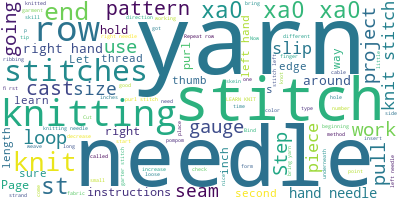

In [63]:
im

## Embeddings

In [64]:
model_name = "sentence-transformers/all-mpnet-base-v2"
# model_name = "sentence-transformers/all-MiniLM-l6-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}

In [65]:
#!pip install sentence-transformers

In [66]:
embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [67]:
from langchain.vectorstores import FAISS

In [68]:
#!pip install faiss-cpu

In [69]:
db = FAISS.from_documents(splits, embeddings)

## Storing the Embeddings in Vector DB

In [70]:
#!pip install chromadb

In [71]:
db = Chroma.from_documents(splits, embeddings)

In [72]:
persist_directory = '../data/chroma/'

# Create the vector store
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embeddings,
    persist_directory=persist_directory
)
vectordb.persist()

In [73]:
vectordb._collection.count()

1209

## Similarity Search